In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

In [2]:
np.random.seed(0) # singleton RandomState

In [3]:
# custom color map
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
    "", ["red", "yellow", "green"]
)

### Data (blob)

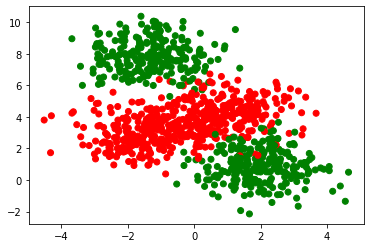

In [4]:
from sklearn.datasets import make_blobs

# generate blob data
data, labels = make_blobs(n_samples=1000, # number of datapoints
                          centers=4, # number of blobs - one blob has one label -> number of classes.
                          n_features=2, # number of inputs
                          random_state=0 # same random_state -> generate same data - for repeatability
                         )


# get 2 classes out of these 4 classes(combining 2 each)
labels_orig = labels
# new label:
labels = np.mod(labels_orig, 2)  # remainder dividing by 2
# 0,2 -> 0
# 1,3 -> 1

plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

from sklearn.model_selection import train_test_split

XX_train, XX_val, Y_train, Y_val = train_test_split(
    data, labels, stratify=labels, random_state=0
)

#### Gradient function:

    grad(self, X, y): #args: input, ground truth
        self.forward_pass(X)  #first do forward pass. this will compute activations,preactivations,predicted o/p
        self.gradient_i = gradient formula
        
Gradient formula will be in terms of:  
- X, y - passed to grad function  
- activations, preactivations, y_pred - computed in forward pass.(Therefore we must do foreward pass before BP)  
- weights, biases - current weights, biases

#### fit function:
iterate over each datapoint(input) - find gradient for each - sum them, average - update grad with avg grad.   
do this for each epoch

### Updating only one weight(parameter)

In DL we take several steps and come up with a system which is actually working, but its hard to understand why. So we try to break the steps into single ones and try to understand each.

loss fn derivative wrt w1 alone. and only update w1. see what happens.

In [5]:
# SimpleFFNet in the previous folder modified 
# to update only w1 values

# and also plot w1 values along with loss

from simple_ff_net_w1 import SimpleFFNetW1

In [14]:
sfnw1 = SimpleFFNetW1()

  0%|          | 0/500 [00:00<?, ?epoch/s]

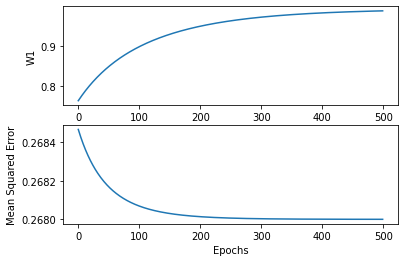

In [15]:
sfnw1.fit(XX_train, Y_train, epochs=500, learning_rate=1, display_loss=True)

Looking at what happens to error, if we only change w1.

Loss is decreasing - BP is working.

only updating w1 => in w1 slice(in loss surface). descending in that slice.  therefore the smooth dec. (?)  
after sometime, it reach the min in the slice.. not much change after that. 

In DL several things are happening and the end result is a model that is trained. If we don't understand the individual steps, we won't understand what is happening. **Going step by step and reasoning what is happening**. 